@dataset{
    dataset,
    author = {Timilsina, Bimal},
    year = {2021},
    month = {08},
    pages = {},
    title = {News Article Category Dataset},
}

In [1]:
import pandas as pd

In [40]:
df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

In [3]:
df['category'] = df['category'].astype('category')

In [77]:
categories = pd.read_csv('../input/category_map.csv', index_col=1, dtype={'CATEGORY': 'category', 'SUB_CATEGORY': 'category'})

In [81]:
category_mapping = categories.to_dict()['CATEGORY']

In [82]:
print(category_mapping)

{'ARTS': 'ENTERTAINMENT', 'ARTS & CULTURE': 'ENTERTAINMENT', 'CULTURE & ARTS': 'ENTERTAINMENT', 'STYLE': 'ENTERTAINMENT', 'STYLE & BEAUTY': 'ENTERTAINMENT', 'ENTERTAINMENT': 'ENTERTAINMENT', 'COMEDY': 'ENTERTAINMENT', 'WEIRD NEWS': 'ENTERTAINMENT', 'SPORTS': 'ENTERTAINMENT', 'FOOD & DRINK': 'ENTERTAINMENT', 'TASTE': 'ENTERTAINMENT', 'HOME & LIVING': 'ENTERTAINMENT', 'WEDDINGS': 'ENTERTAINMENT', 'U.S. NEWS': 'NEWS', 'WORLD NEWS': 'NEWS', 'POLITICS': 'NEWS', 'CRIME': 'NEWS', 'BUSINESS': 'NEWS', 'MEDIA': 'NEWS', 'COLLEGE': 'NEWS', 'EDUCATION': 'NEWS', 'THE WORLDPOST': 'NEWS', 'WORLDPOST': 'NEWS', 'TECH': 'SCIENCE', 'SCIENCE': 'SCIENCE', 'ENVIRONMENT': 'SCIENCE', 'GREEN': 'SCIENCE', 'HEALTHY LIVING': 'SCIENCE', 'WELLNESS': 'SCIENCE', 'FIFTY': 'LIFESTYLE', 'MONEY': 'LIFESTYLE', 'PARENTS': 'LIFESTYLE', 'GOOD NEWS': 'LIFESTYLE', 'WOMEN': 'LIFESTYLE', 'TRAVEL': 'LIFESTYLE', 'RELIGION': 'LIFESTYLE', 'DIVORCE': 'LIFESTYLE', 'PARENTING': 'LIFESTYLE', 'LATINO VOICES': 'LIFESTYLE', 'QUEER VOICES': 

In [83]:
df['main_category'] = df['category'].map(category_mapping)

In [85]:
from sklearn.model_selection import train_test_split

x = df['headline']
y = df['main_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(stop_words="english", lowercase=True, ngram_range=(1,2), max_features=5000), LogisticRegression(max_iter=500, class_weight='balanced'))

model.fit(x_train, y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [88]:
labels = model.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

category_names = pd.unique(y_train)
print(classification_report(y_test, labels, target_names=category_names))
mat = confusion_matrix(y_test, labels, labels=category_names)
f1_score_result = f1_score(y_test, labels, average='micro')

               precision    recall  f1-score   support

ENTERTAINMENT       0.78      0.74      0.76     12603
         NEWS       0.67      0.60      0.64     10464
    LIFESTYLE       0.80      0.77      0.78     12236
      SCIENCE       0.56      0.75      0.64      6603

     accuracy                           0.72     41906
    macro avg       0.70      0.72      0.71     41906
 weighted avg       0.72      0.72      0.72     41906



0.715267503460125
[[9280  804 1326 1193]
 [ 614 9417 1097 1108]
 [1484 1090 6327 1563]
 [ 551  462  640 4950]]


Text(-3.250000000000007, 0.5, 'predicted label')

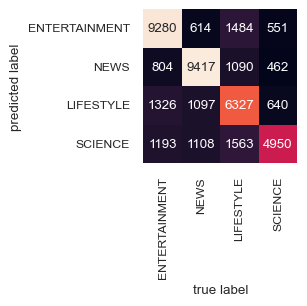

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np

np.set_printoptions(threshold=1000)

print(f1_score_result)

print(mat)

plt.rcParams.update({'font.size': 8, 'figure.figsize': [2, 2]})
sns.set(font_scale=0.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=category_names, yticklabels=category_names)
plt.xlabel('true label')
plt.ylabel('predicted label')